In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

51.801918443421414 1.0433242072018345
85.26464971377402 113.85453346068999
27.45332320968913 12.67902430294015
72.62566827103652 -136.38206922685134
-88.8967840966501 -172.6632313335626
20.751638524789513 94.92539372600146
-9.374476642918651 -127.4431852852235
16.482094703304938 2.9053511100584615
86.8395017869125 116.90174849352644
-35.238575368254814 95.16470672470979
50.895343674444405 71.80014155373718
76.84480386717522 -56.474272936589955
-69.68772974026497 46.94872550875448
35.362131803638334 135.42581512876063
51.401333766341594 113.72541250853078
67.52927914253962 160.22341826196185
68.49939814296812 43.154012288921905
44.83113199536493 62.36537687907415
-79.63917806087665 -71.29100211298676
86.0418707183436 -6.126106155931382
-4.674140327730896 4.238145970002023
-68.23494971793724 78.21300298407948
49.62200520164674 107.20713689659169
-78.46503411900069 -45.07086639813525
-70.69244807982852 141.82847295269733
24.862424605640854 -83.66750721051379
-65.33035997538165 137.5123447

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

643

In [7]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | clacton-on-sea
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | awbari
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | chauk
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | filingue
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | astana
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | maizuru
Processing Record 14 of Set 1 | darasun
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | kamenka
Processing Record 17 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | omboue
Processing Record 21 of Set 1 | chikoy
City not found. Skipping...
Proce

Processing Record 37 of Set 4 | kletnya
Processing Record 38 of Set 4 | dunedin
Processing Record 39 of Set 4 | airai
Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | jamestown
Processing Record 42 of Set 4 | namatanai
Processing Record 43 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 4 | amga
Processing Record 45 of Set 4 | ijaki
City not found. Skipping...
Processing Record 46 of Set 4 | aparecida do taboado
Processing Record 47 of Set 4 | urengoy
Processing Record 48 of Set 4 | narbonne
Processing Record 49 of Set 4 | nsanje
Processing Record 50 of Set 4 | tucuman
Processing Record 1 of Set 5 | aleksandrovskoye
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | severo-kurilsk
Processing Record 5 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 5 | monroe
Processing Record 7 of Set 5 | nome
Processing Record 8 of Set 5 | yarada
Pro

Processing Record 24 of Set 8 | anloga
Processing Record 25 of Set 8 | huarmey
Processing Record 26 of Set 8 | bahia blanca
Processing Record 27 of Set 8 | balkhash
Processing Record 28 of Set 8 | leeuwarden
Processing Record 29 of Set 8 | uruzgan
Processing Record 30 of Set 8 | redlands
Processing Record 31 of Set 8 | maniitsoq
Processing Record 32 of Set 8 | davila
Processing Record 33 of Set 8 | raga
Processing Record 34 of Set 8 | santa rosa
Processing Record 35 of Set 8 | kropotkin
Processing Record 36 of Set 8 | hailey
Processing Record 37 of Set 8 | dzerzhinskoye
Processing Record 38 of Set 8 | tiruvottiyur
City not found. Skipping...
Processing Record 39 of Set 8 | heze
Processing Record 40 of Set 8 | klyuchi
Processing Record 41 of Set 8 | san cristobal
Processing Record 42 of Set 8 | wad madani
Processing Record 43 of Set 8 | dharchula
Processing Record 44 of Set 8 | leticia
Processing Record 45 of Set 8 | cap malheureux
Processing Record 46 of Set 8 | kanniyakumari
Processin

Processing Record 13 of Set 12 | bodden town
Processing Record 14 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 15 of Set 12 | anadyr
Processing Record 16 of Set 12 | haines junction
Processing Record 17 of Set 12 | oktyabrskoye
Processing Record 18 of Set 12 | ust-tsilma
Processing Record 19 of Set 12 | gaoual
Processing Record 20 of Set 12 | benghazi
Processing Record 21 of Set 12 | mengcheng
Processing Record 22 of Set 12 | san rafael
Processing Record 23 of Set 12 | matara
Processing Record 24 of Set 12 | gizo
Processing Record 25 of Set 12 | byron bay
Processing Record 26 of Set 12 | wawa
Processing Record 27 of Set 12 | sept-iles
Processing Record 28 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 29 of Set 12 | lompoc
Processing Record 30 of Set 12 | tooele
Processing Record 31 of Set 12 | erdaojiang
Processing Record 32 of Set 12 | cheremkhovo
Processing Record 33 of Set 12 | rio gallegos
Processing Record 34 of Set 12 | buenos aires
P

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clacton-On-Sea,51.7897,1.1560,47.01,76,89,8.01,GB,2023-02-01 21:49:59
1,Saskylakh,71.9167,114.0833,-11.74,98,100,9.82,RU,2023-02-01 21:49:59
2,Awbari,26.5921,12.7805,48.09,44,0,7.54,LY,2023-02-01 21:49:59
3,Tuktoyaktuk,69.4541,-133.0374,-36.40,74,20,0.00,CA,2023-02-01 21:50:00
4,Vaini,-21.2000,-175.2000,84.36,74,75,14.97,TO,2023-02-01 21:50:00
5,Chauk,20.8833,94.8167,72.64,53,8,0.98,MM,2023-02-01 21:50:00
6,Atuona,-9.8000,-139.0333,78.91,75,76,17.54,PF,2023-02-01 21:50:00
7,Filingue,14.3521,3.3168,78.84,14,86,6.15,NE,2023-02-01 21:50:01
8,Busselton,-33.6500,115.3333,55.00,79,6,14.72,AU,2023-02-01 21:50:01
9,Astana,51.1801,71.4460,-5.85,71,26,8.95,KZ,2023-02-01 21:50:01


In [12]:
new_column_order = ["column2", "column4", "column1"]

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

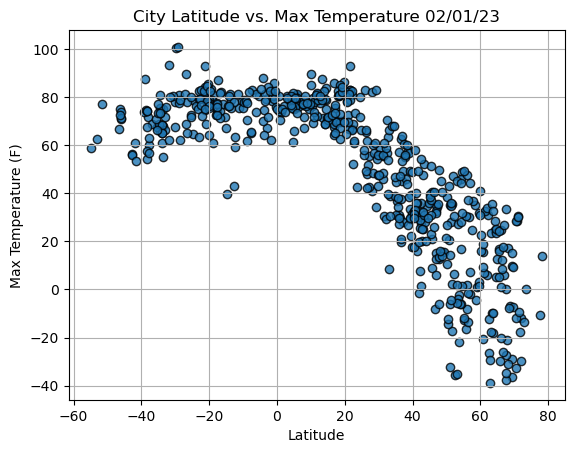

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

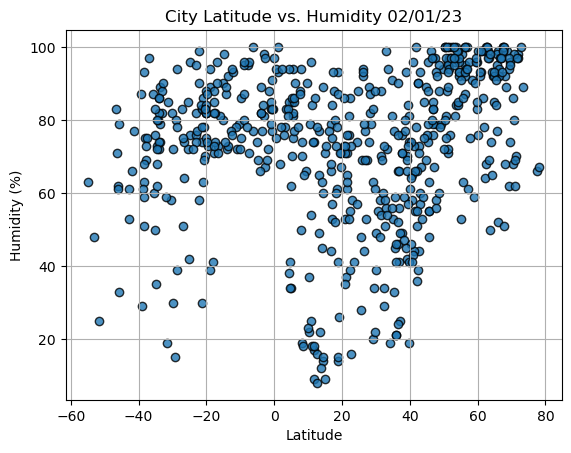

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

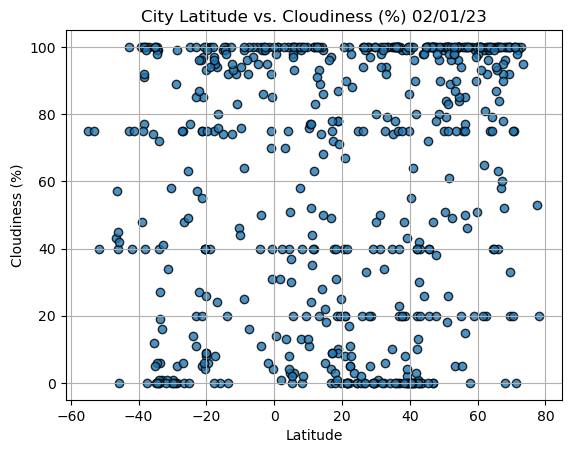

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

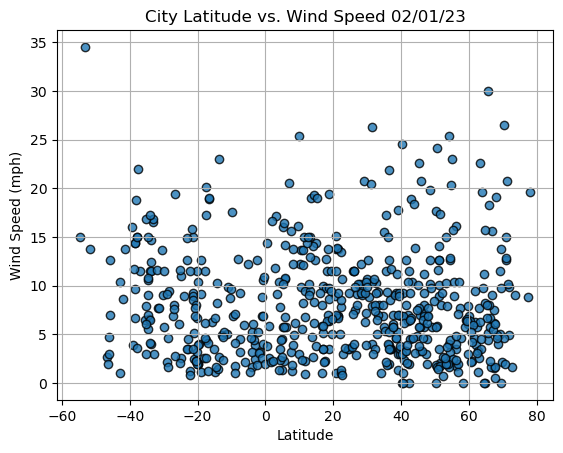

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                      Darasun
Lat                       51.6667
Lng                         114.0
Max Temp                   -17.21
Humidity                      100
Cloudiness                     61
Wind Speed                   2.01
Country                        RU
Date          2023-02-01 21:50:05
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clacton-On-Sea,51.7897,1.1560,47.01,76,89,8.01,GB,2023-02-01 21:49:59
1,Saskylakh,71.9167,114.0833,-11.74,98,100,9.82,RU,2023-02-01 21:49:59
2,Awbari,26.5921,12.7805,48.09,44,0,7.54,LY,2023-02-01 21:49:59
3,Tuktoyaktuk,69.4541,-133.0374,-36.40,74,20,0.00,CA,2023-02-01 21:50:00
5,Chauk,20.8833,94.8167,72.64,53,8,0.98,MM,2023-02-01 21:50:00


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

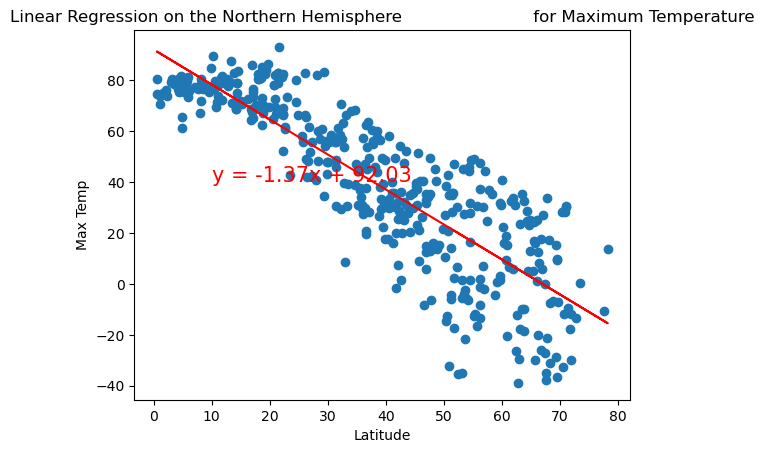

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

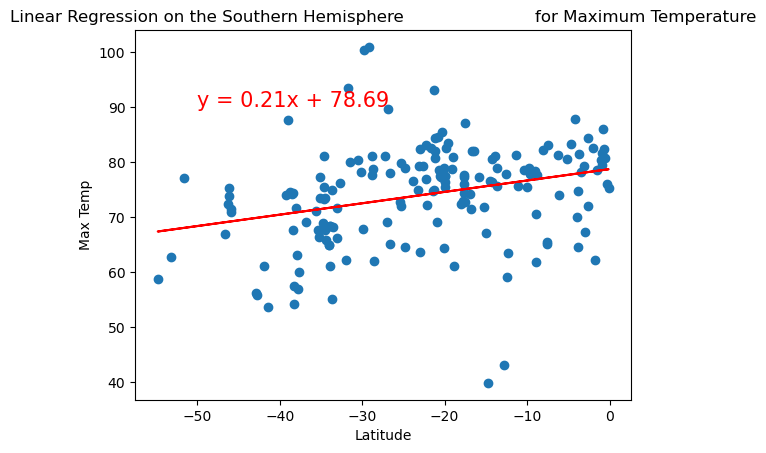

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

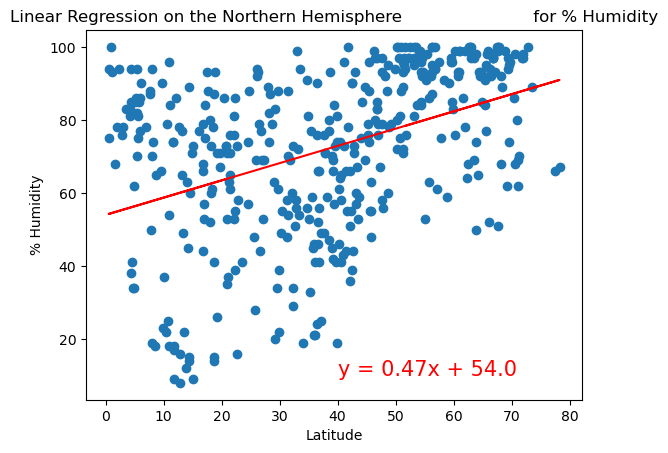

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

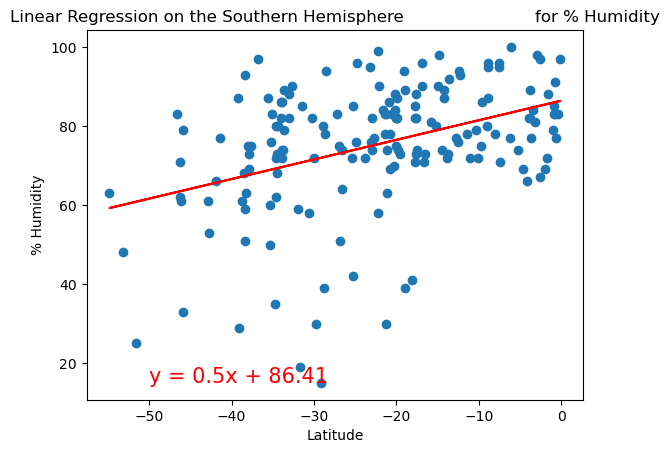

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

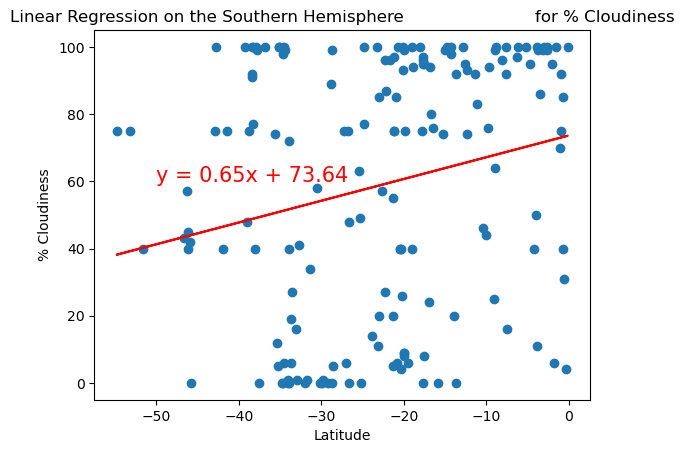

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

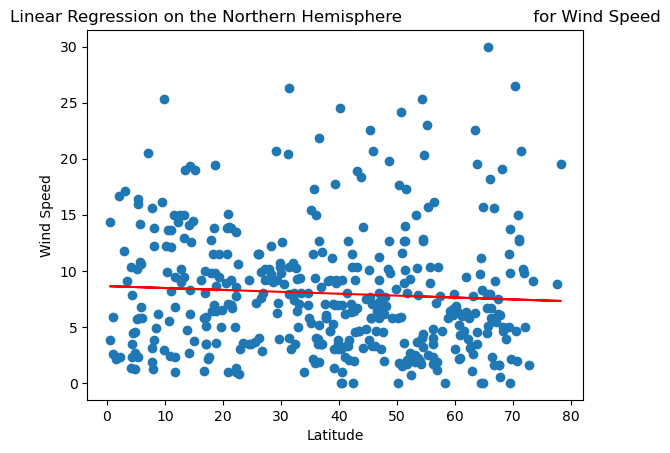

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

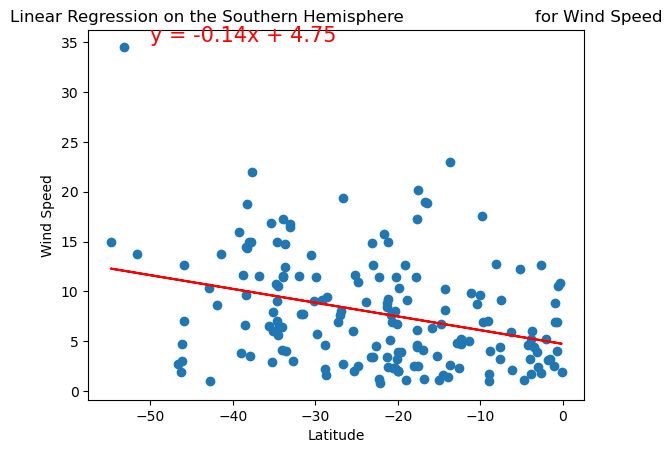

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [30]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [31]:
preferred_cities_df = city_data_df.loc[
    (city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"] >= min_temp)
]
preferred_cities_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Vaini,-21.2000,-175.2000,84.36,74,75,14.97,TO,2023-02-01 21:50:00
6,Atuona,-9.8000,-139.0333,78.91,75,76,17.54,PF,2023-02-01 21:50:00
7,Filingue,14.3521,3.3168,78.84,14,86,6.15,NE,2023-02-01 21:50:01
17,Omboue,-1.5746,9.2618,78.51,88,100,3.20,GA,2023-02-01 21:50:07
19,Key West,24.5557,-81.7826,80.01,74,0,9.22,US,2023-02-01 21:46:59
21,Kapaa,22.0752,-159.3190,81.10,76,0,5.01,US,2023-02-01 21:50:08
23,Carnarvon,-24.8667,113.6333,78.89,76,77,10.98,AU,2023-02-01 21:50:09
26,Avarua,-21.2078,-159.7750,80.65,83,75,9.22,CK,2023-02-01 21:50:10
27,Cidreira,-30.1811,-50.2056,78.15,82,0,9.06,BR,2023-02-01 21:50:10
31,Rikitea,-23.1203,-134.9692,79.30,76,11,14.85,PF,2023-02-01 21:50:12


In [32]:
preferred_cities_df.count()

City          166
Lat           166
Lng           166
Max Temp      166
Humidity      166
Cloudiness    166
Wind Speed    166
Country       166
Date          166
dtype: int64

In [33]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
4,Vaini,TO,84.36,-21.2000,-175.2000,
6,Atuona,PF,78.91,-9.8000,-139.0333,
7,Filingue,NE,78.84,14.3521,3.3168,
17,Omboue,GA,78.51,-1.5746,9.2618,
19,Key West,US,80.01,24.5557,-81.7826,
21,Kapaa,US,81.10,22.0752,-159.3190,
23,Carnarvon,AU,78.89,-24.8667,113.6333,
26,Avarua,CK,80.65,-21.2078,-159.7750,
27,Cidreira,BR,78.15,-30.1811,-50.2056,
31,Rikitea,PF,79.30,-23.1203,-134.9692,


In [36]:
from config import geoapify_key

In [37]:
# Set initial parameters to search for a hotel.
radius = 5000
params = {
    "categories":"accommodation.hotel",
    "apiKey": geoapify_key,
}